In [1]:
import json
import os
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import training_scripts.domain.sampler as sampler

In [2]:
def load_data(directory):
    data_dicts = []
    for file in os.listdir(directory):
        with open(os.path.join(directory, file), 'r') as f:
            data_dict = json.load(f)
        data_dicts.append(data_dict)
    return data_dicts

In [3]:
def build_dataframe(data_dicts):
    return pd.json_normalize(data_dicts)


def reformat_dataframe(df, columns_to_keep):
    df = df.rename(columns_to_keep, axis=1)
    df = df[list(columns_to_keep.values())]
    return df

In [201]:
def drop_unlabeled_data(df, column):
    return df.dropna(subset=[column])


def balance_data(df, column):
    df_grouped = df.groupby(column)
    sample_size =  

    def sample(df):
        return df.sample(sample_size).reset_index(drop=True)

    df_grouped_sampled = df_grouped.apply(sample)
    df_sampled = pd.DataFrame(df_grouped_sampled)
    df_sampled = df_sampled.droplevel(level=0)
    return df_sampled

In [5]:
def count_keywords(df, columns, keywords):
    for keyword in keywords:

        def count_keyword(string):
            return sum(
                keyword in word
                for word in string.lower().split())

        df[keyword] = df[columns].applymap(count_keyword).sum(axis=1)
    return df

In [6]:
def fit_model(x, y):
    model = LogisticRegression()
    model.fit(x, y)
    return model

In [7]:
def plot_confusion_matrix(model, x, y):
    matrix = confusion_matrix(y, model.predict(x), normalize='true')
    display = ConfusionMatrixDisplay(matrix, ['Not COVID', 'COVID'])
    display.plot()

/home/dbinley/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass display_labels=['Not COVID', 'COVID'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


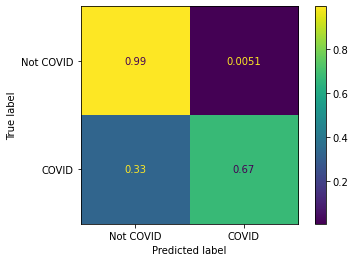

In [258]:
directory = '../data/news_articles/balanced_dataset/'
data = load_data(directory)

df = build_dataframe(data)

columns_to_keep = {
    'LABEL.WANT_ON_MAP': 'label',
    'ARTICLE.TEXT': 'text',
    'ARTICLE.TITLE': 'title'}
df = reformat_dataframe(df, columns_to_keep)

column = 'label'
df = drop_unlabeled_data(df, column)

columns = [
    'text',
    'title']
keywords = [
    'covid',
    'corona',
    'pandem',
    'epidem',
    'mask',
    'quarant']
df = count_keywords(df, columns, keywords)

#balanced = balance_data(df, column)
balanced = sample_data(df,column)
model = fit_model(balanced[keywords], balanced[column].astype(bool))

plot_confusion_matrix(model, df[keywords], df[column].astype(bool))

In [91]:
from sklearn.ensemble import RandomForestClassifier
def fit_forest(x,y):
     # create regressor object
    model = RandomForestClassifier(n_estimators=50, random_state=0)
    model.fit(x, y)
    # fit the regressor with x and y data
    return model 
    

/home/dbinley/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass display_labels=['Not COVID', 'COVID'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


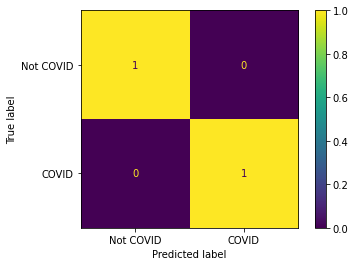

In [95]:
directory = '../data/news_articles/balanced_dataset/'
data = load_data(directory)

df = build_dataframe(data)

columns_to_keep = {
    'LABEL.WANT_ON_MAP': 'label',
    'ARTICLE.TEXT': 'text',
    'ARTICLE.TITLE': 'title'}
df = reformat_dataframe(df, columns_to_keep)

column = 'label'
df = drop_unlabeled_data(df, column)
df = balance_data(df, column)

columns = [
    'text',
    'title']
keywords = [
    'covid',
    'corona',
    'pandem',
    'epidem',
    'mask',
    'quarant']
df = count_keywords(df, columns, keywords)

model = fit_forest(df[keywords], df[column].astype(bool))

plot_confusion_matrix(model, df[keywords], df[column].astype(bool))

/home/dbinley/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass display_labels=['Not COVID', 'COVID'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


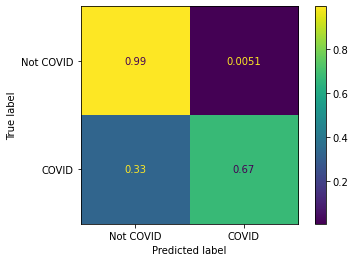

In [259]:

import joblib
knn = model 
# Save the model as a pickle in a file
joblib.dump(knn, 'logistic_regression.pkl')
  
# Load the model from the file
knn_from_joblib = joblib.load('logistic_regression.pkl') 
  
# Use the loaded model to make predictions
plot_confusion_matrix(model, df[keywords], df[column].astype(bool))

In [98]:
model.predict(df[keywords])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [203]:
from typing import List
def find_coronavirus_stories(data_dicts: List[dict]) -> List[dict]:
#    coronavirus_data_dicts = []
#    for data_dict in data_dicts:
#        title = data_dict.get('ARTICLE', {}).get('TITLE', '')
#        if _string_contains_covid(title):
#            coronavirus_data_dicts.append(data_dict)
#    return coronavirus_data_dicts

    df = build_dataframe(data)

    columns_to_keep = {
        #'LABEL.WANT_ON_MAP': 'label',
        'ARTICLE.TEXT': 'text',
        'ARTICLE.TITLE': 'title'}
    df = reformat_dataframe(df, columns_to_keep)

    #column = 'text'
    df = drop_unlabeled_data(df, 'title')
    df = drop_unlabeled_data(df, 'text')

    columns = [
        'text',
        'title']
    keywords = [
        'covid',
        'corona',
        'pandem',
        'epidem',
        'mask',
        'quarant']
    df = count_keywords(df, columns, keywords)


    df['predicted'] = model.predict(df[keywords]);

    final_df = df[df['predicted'] == True]
    final_df = final_df.drop(['predicted'], axis = 1)

    return final_df.to_dict('records')

def build_dataframe(data_dicts):
    return pd.json_normalize(data_dicts)


def reformat_dataframe(df, columns_to_keep):
    df = df.rename(columns_to_keep, axis=1)
    df = df[list(columns_to_keep.values())]
    return df

def drop_unlabeled_data(df, column):
    return df.dropna(subset=[column])


def balance_data(df, column):
    df_grouped = df.groupby(column)
    sample_size = df_grouped.size().min()

    def sample(df):
        return df.sample(sample_size).reset_index(drop=True)

    df_grouped_sampled = df_grouped.apply(sample)
    df_sampled = pd.DataFrame(df_grouped_sampled)
    df_sampled = df_sampled.droplevel(level=0)
    return df_sampled

def count_keywords(df, columns, keywords):
    for keyword in keywords:

        def count_keyword(string):
            return sum(
                keyword in word
                for word in string.lower().split())

        df[keyword] = df[columns].applymap(count_keyword).sum(axis=1)
    return df
#x= find_coronavirus_stories(df.to_dict('records'))

In [ ]:
df = build_dataframe(data)

columns_to_keep = {
    #'LABEL.WANT_ON_MAP': 'label',
    'ARTICLE.TEXT': 'text',
    'ARTICLE.TITLE': 'title'}
df = reformat_dataframe(df, columns_to_keep)

#column = 'text'
df = drop_unlabeled_data(df, 'title')

In [144]:
# TfidfVectorizer 
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
# set of documents
train = ['The sky is blue.','The sun is bright.']
test = ['The sun in the sky is bright', 'We can see the shining sun, the bright sun.']
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)
#retrieve the terms found in the corpora
# if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)


Count Vectorizer

   blue  bright  sky  sun
0     1       0    1    0
1     0       1    0    1

TD-IDF Vectorizer

       blue    bright       sky       sun
0  0.707107  0.000000  0.707107  0.000000
1  0.000000  0.707107  0.000000  0.707107


In [175]:
def vectorize(df):
    train = df['text'] 
    # instantiate the vectorizer object
    tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
    # convert th documents into a matrix
    tfidf_wm = tfidfvectorizer.fit_transform(train)
    tfidf_tokens = tfidfvectorizer.get_feature_names()
    df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
    return df_tfidfvect

(1732, 34930)
(34, 34930)

(184, 34930)
(9, 34930)


/home/dbinley/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass display_labels=['Not COVID', 'COVID'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


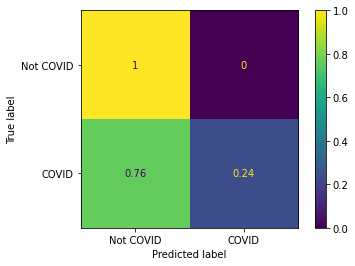

In [262]:
def balance_data(df, column):
    df_grouped = df.groupby(column)
    sample_size = df_grouped.size().min()

    def sample(df):
        return df.sample(sample_size).reset_index(drop=True)

    df_grouped_sampled = df_grouped.apply(sample)
    df_sampled = pd.DataFrame(df_grouped_sampled)
    df_sampled = df_sampled.droplevel(level=0)
    return df_sampled
def sample_data(df, column):
#     true = df[df[column] == True].sample(frac = .5)
#     false = df[df[column] == False].sample(frac = .1)
#     return pd.concat(
#         [
#             true,
#             false 
#         ]
#     )
    return df.sample(frac=.25)
directory = '../data/news_articles/balanced_dataset/'
data = load_data(directory)

df = build_dataframe(data)

columns_to_keep = {
    'LABEL.WANT_ON_MAP': 'LABELLLLLL',
    'ARTICLE.TEXT': 'text',
    'ARTICLE.TITLE': 'title'}
df = reformat_dataframe(df, columns_to_keep)

column = 'LABELLLLLL'
df = drop_unlabeled_data(df, column)

columns = [
    'LABELLLLLL',
    'text',
    'title']
#df = count_keywords(df, columns, keywords)
df[column].value_counts()
df.head()
df = pd.concat(
    [
        df,
        vectorize(df)
    ], axis=1
)
print(df.shape)
df =df.dropna()
print(df[df[column] == True].shape)
print()

balanced = sample_data(df,column)
print(balanced.shape)
print(balanced[balanced[column] == True].shape)
model = fit_forest(balanced.drop(columns , axis = 1), balanced[column].astype(bool))

plot_confusion_matrix(model, df.drop(columns, axis = 1), df[column].astype(bool))